In [5]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv('./uk_books.csv')
new_df = df

In [33]:
from sklearn.neighbors import KNeighborsClassifier

#Talking number of neighbours being about sqaure root of number of samples
model = KNeighborsClassifier(n_neighbors=35)




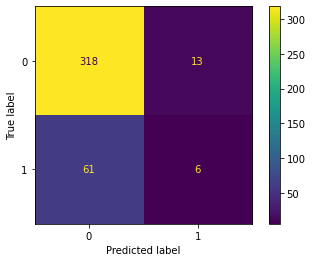

In [34]:
names = ['listingIsTopRated','sellerFeedbackScore','sellerPositivePercent','sellerIsTopRated','price','endAtWeekend','endAtEvening','length','isBroken','isUsed','isSet','freeShipping']
from sklearn import metrics

from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(new_df[names], new_df['isSold'], test_size=0.3) # 70% training and 30% test


#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset

y_pred_one = knn.predict(X_test)

acc_one = accuracy_score(y_test, y_pred_one)

cm = confusion_matrix(y_test, y_pred_one, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

disp.plot()

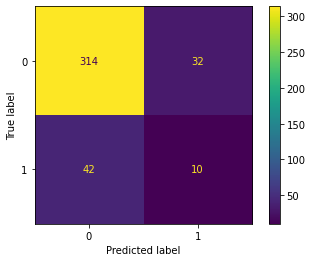

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(new_df[names], new_df['isSold'], test_size=0.3) # 70% training and 30% test


clf = SVC(kernel='linear')
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
two_acc = accuracy_score(Y_test,y_pred)

cm = confusion_matrix(Y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

disp.plot()

In [36]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_pred_one, y_pred)

-0.03527025835464248

In [37]:
print(f'Accuracy of kNN is {acc_one}. Accuracy of SVG is {two_acc}')

Accuracy of kNN is 0.8140703517587939. Accuracy of SVG is 0.8140703517587939


In [40]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
  

# Input_x_Features.
x = new_df[names]                       
 
# Input_ y_Target_Variable.
y = new_df['isSold']                      
   
  
# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
  
# Create  classifier object.
lr = linear_model.LogisticRegression()
  
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(x, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))
  
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.8646616541353384, 0.849624060150376, 0.8796992481203008, 0.8721804511278195, 0.8646616541353384, 0.8636363636363636, 0.8712121212121212, 0.8712121212121212, 0.8712121212121212, 0.8787878787878788]

Maximum Accuracy That can be obtained from this model is: 87.96992481203007 %

Minimum Accuracy: 84.9624060150376 %

Overall Accuracy: 86.8688767372978 %

Standard Deviation is: 0.008666292709579259
